# Calculating the phonon modes of MgO


First you will have to manually **input the previously optimised lattice constant of the conventional cell** to the "a_opt" parameter in the code below. Please make sure you choose the right value (primitive/conventional). If you don't remember how to specify the geometry for the crystal creation, have a look at the [Optimise the structure](optimisation.ipynb) section. In order to check if the imported value is the correct one you can visualise the cell by using the view() command.

** If the plot does not show up, please run the code again.

** Notice that the dispersion curve is plotted along this path in the reciprocal space:

    W = 0.5 0.25 0.75
    L = 0.5 0.5 0.5
    G = 0.0 0.0 0.0
    X = 0.5 0.0 0.5
    W = 0.5 0.25 0.75
    
**Notice that the k points are in fractional coordinates with respect to the lattice vectors in reciprocal space.**

In [6]:
#INPUT TO BE PROVIDED
#INSTERT HERE THE VALUE FOR THE OPTIMISED LATTICE CONSTANT OF THE CONVENCTIONAL CELL
a_opt = 4.212

The following cell will take 3-4 minutes to run.

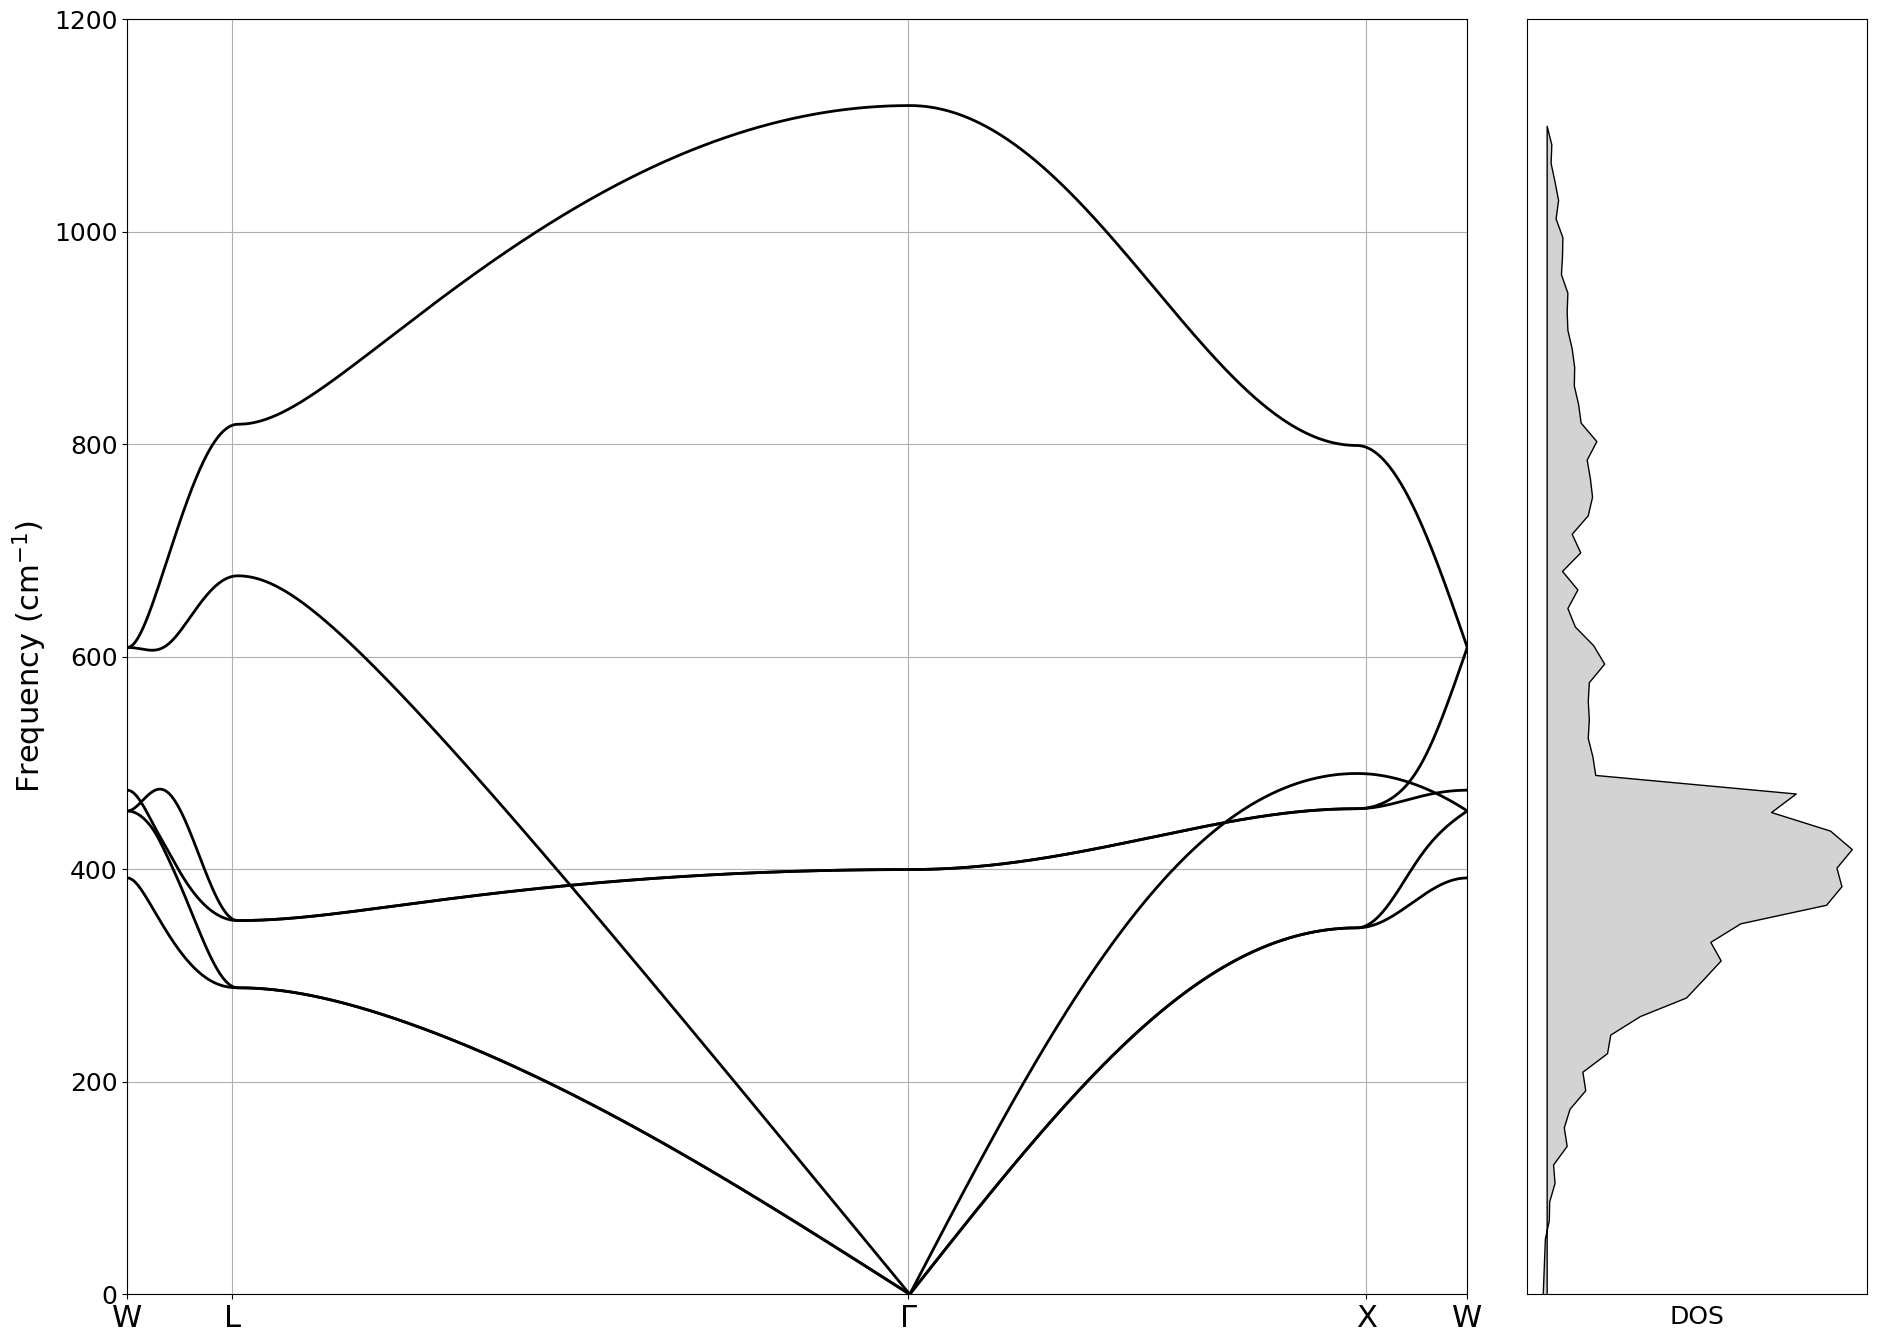

In [7]:
# the import first
import set_mygulp_vars
import matplotlib.pyplot as plt
import numpy as np
import warnings
import math
from ase.calculators.gulp import GULP
from ase.spacegroup import crystal
from ase.dft.kpoints import ibz_points, bandpath
from ase.visualize import view
from scipy.spatial.distance import pdist



# some settings to make the output look nice
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [20, 15]

# setting the name of the calculation
label = 'mgo_ph'

# The following section is used to define the k point path by using the tools implemented in ASE
# First we need to specify the space group
k_points = ibz_points['fcc']

# this is the name of the k points we want to sample 
k_path = ('W,L,Gamma,X,W')
l = []
L = np.zeros((6, 3))
k_path_coord = ''
tot_path = 0.
# obtain the coordinates of the k points specified above 
for j,i in enumerate(k_path.split(',')):
    l = (k_points['{}'.format(str(i))])
    L[j] = l
    k_path_coord += ("{} to ".format(" ".join(str(x) for x in l)))

# we need to write the string specifying the path for the gulp calculation
k_path_coord = k_path_coord[0:-4]

# calculating the position of the vertical lines for the plot
l_path = [0.]
tot_path = 0.
for i in range(len(L)-2):
    tot_path += float(pdist(L[i:i+2]))
    l_path.append(tot_path)

#creation of the structure and setting of the options
MgO_ph = crystal('MgO',basis=[[0.0,0.0,0.0],[0.5,0.5,0.5]],spacegroup=225,cellpar=[a_opt, a_opt, a_opt, 90, 90, 90],primitive_cell=True)
#----------------------here-----------------------
options = ['shrink 16 16 16','dispersion 1 1000', k_path_coord,'output phon '+label,'output eig '+label]
calc = GULP(label=label ,keywords='conp phon', library='ionic.lib',options=options)
# running the gulp calculation
MgO_ph.calc = calc
MgO_ph.get_potential_energy()

#loading the data for the phonon dispersion from the .disp file
result = np.loadtxt(label+'.disp')
q = np.arange(len(result)/6)
#setting the position of the vertical lines
Q = [0, 78, 580, 920, 995]

# Plot the phonon dispersion
plt.figure(1)
plt.figure(1, (8, 6))
plt.axes([.1, .07, .67, .85])
for i in range(6):
    omega_n = result[i::6,1]
    plt.plot(q, omega_n, 'k', lw=2)

k_path_names = ['W', 'L', '$\\Gamma$', 'X','W']
plt.xticks(Q, k_path_names, fontsize=22)
plt.yticks(fontsize=18)
plt.xlim(q[0], q[-1])
plt.ylim(0, 1200)
plt.ylabel("Frequency ($\mathrm{cm^{-1}}$)", fontsize=22)
plt.grid('on')

#loading the data for the DOS from the .dens file
result_dos = np.loadtxt(label+'.dens')
#plotting the DOS
plt.axes([.8, .07, .17, .85])
plt.fill_between(result_dos[:,1]*100,result_dos[:,0], y2=0, color='lightgrey', edgecolor='k', lw=1)
plt.ylim(0, 1200)
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel("DOS", fontsize=18)
plt.show()

#### Calculating the DOS of MgO

Test the convergence of the DOS by varying the grid size. To do so input in the "grids = " section the N of the NxNxN grids that you want to test. The DOS will be automatically plotted below the cell


In [8]:
#INPUT TO BE PROVIDED
#INSERT HERE THE VALUE FOR THE OPTIMISED LATTICE CONSTANT
a_opt = 4.212

grids = '1 4 8 12 16 20'
grids = [int(x) for x in grids.split()]

In [9]:
for i in grids:
    label = 'mgo_ph_dos_'+str(i)
    options = ['shrink {} {} {}'.format(i, i, i),'output phon '+label]
    print(options)

['shrink 1 1 1', 'output phon mgo_ph_dos_1']
['shrink 4 4 4', 'output phon mgo_ph_dos_4']
['shrink 8 8 8', 'output phon mgo_ph_dos_8']
['shrink 12 12 12', 'output phon mgo_ph_dos_12']
['shrink 16 16 16', 'output phon mgo_ph_dos_16']
['shrink 20 20 20', 'output phon mgo_ph_dos_20']


area = -402.5474903816075
area = 15.91008354811802
area = 17.278377236051575
area = 17.235983643271936
area = 17.32645584401819
area = 17.3276064224109
Time to calculate the DOS (1x1x1 grid) 0.0878 s
Time to calculate the DOS (4x4x4 grid) 0.0928 s
Time to calculate the DOS (8x8x8 grid) 0.2972 s
Time to calculate the DOS (12x12x12 grid) 3.2553 s
Time to calculate the DOS (16x16x16 grid) 9.2194 s
Time to calculate the DOS (20x20x20 grid) 4.861 s


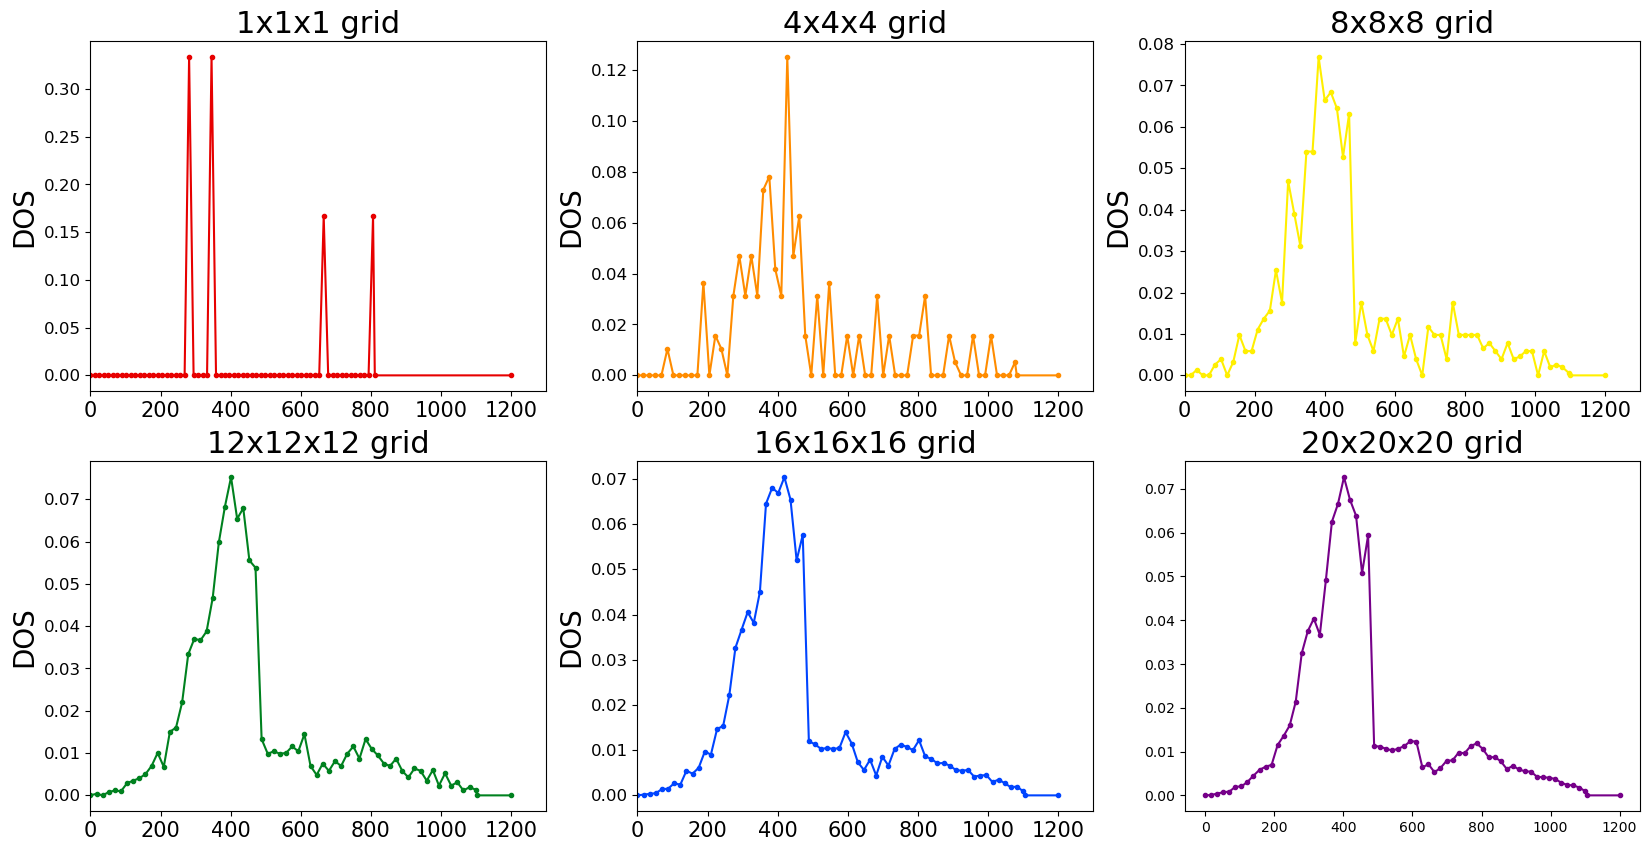

In [13]:
# the imports first, always
%matplotlib inline
from ase.calculators.gulp import GULP
import matplotlib.pyplot as plt
from math import ceil
from ase.spacegroup import crystal
import numpy as np
from time import time

from scipy.integrate import simpson


label = 'mgo_dos'


#Plotting options
plt.rcParams['figure.figsize'] = [20, 10]
c = ['#E70000','#FF8C00','#FFEF00','#00811F','#0044FF','#760089']
# These are the HTML color codes for the rainbow flag. 
# They usually are the symbol of the LGBTQ+ community.
# However, they are used here to point out the fact that Imperial College is against ANY form
# of discrimination (http://www.imperial.ac.uk/equality/). 
# If, for any reason, you want to change these colors you can find the HTML color codes at 
# this webpage (https://htmlcolorcodes.com/).

if len(grids) <= 4:
    nc_plots = 2
else:
    nc_plots = 3

MgO_dos = crystal('MgO',basis=[[0.0,0.0,0.0],[0.5,0.5,0.5]],spacegroup=225,cellpar=[a_opt, a_opt, a_opt, 90, 90, 90],primitive_cell=True)

# the following is a loop to calculate the DOS for the grid sizes you gave in the input.
# You might want to understand how the loop structure works in order to use it in the
# following parts of the lab
index = 0
times = []
for i in grids:
    b = time()
    index += 1
    label = 'mgo_ph_dos_'+str(i)
    #----------------------here-----------------------
    options = ['shrink {} {} {}'.format(i, i, i),'output phon '+label]
    calc = GULP(label=label ,keywords='conp phon', library='ionic.lib',options=options)
    dos_file = label+'.dens'
    MgO_dos.calc = calc
    Energy = MgO_dos.get_potential_energy()
    result = np.loadtxt(label+'.dens')
    result = np.concatenate((result,np.array([[result[-1][0]+5,0.0],[1200,0.0]])),axis = 0)
    
    plt.ylabel("DOS", fontsize=20)
    #plt.xlabel("Energy", fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=12)
    plt.xlim(0., 1300.)
    plt.subplot(ceil(len(grids)/nc_plots), nc_plots, index)
    
    plt.title('{}x{}x{} grid'.format(i,i,i),fontsize = 22, y=1)
    plt.plot(result[:,0],result[:,1], '{}'.format(c[(index-1)%6]), linestyle='-',marker='.')
    #print(result)
    print("area =", simpson(result[:,1],result[:,0], dx=0.5))
    times.append(time()-b)
    
for i,j in enumerate(times):
    print('Time to calculate the DOS ({}x{}x{} grid)'.format(grids[i],grids[i],grids[i]),round(j,4),'s')


In [44]:
def get_area_below(i):
    a_opt = 4.212
    label = 'mgo_dos'

    if len(grids) <= 4:
        nc_plots = 2
    else:
        nc_plots = 3

    MgO_dos = crystal('MgO',basis=[[0.0,0.0,0.0],[0.5,0.5,0.5]],spacegroup=225,cellpar=[a_opt, a_opt, a_opt, 90, 90, 90],primitive_cell=True)
    label = 'mgo_ph_dos_'+str(i)
    #----------------------here-----------------------
    options = ['shrink {} {} {}'.format(i, i, i),'output phon '+label]
    calc = GULP(label=label ,keywords='conp phon', library='ionic.lib',options=options)
    dos_file = label+'.dens'
    MgO_dos.calc = calc
    Energy = MgO_dos.get_potential_energy()
    result = np.loadtxt(label+'.dens')
    result = np.concatenate((result,np.array([[result[-1][0]+5,0.0],[1200,0.0]])),axis = 0)
    area_inte = simpson(result[:,1],result[:,0], dx=0.1)
    #print("area =", area_inte)
    return area_inte

In [46]:
area_list = []
ini_grad = np.arange(2,50)[1:]
for i in ini_grad:
    area_list.append(get_area_below(i))
    print(get_area_below(i))
    


13.02325783697275
15.91008354811802
16.71312971456929
17.033185324252244
17.19091492912229
17.278377236051575
17.11699373168588
17.213406125350595
17.277641093264883
17.235983643271936
17.286934005734462
17.30634330418469
17.337884448223587
17.32645584401819
17.29199228277237
17.296428101175803
17.323544240767795
17.3276064224109
17.332535676754116
17.338145548622336
17.332178631545588
17.335381074016958
17.333721432369575
17.333647678064082
17.34932073034194
17.349797136922515
17.339358849944976
17.337126173569583
17.33616154011342
17.349249079662346
17.348965565592387
17.34813817735116
17.342588296668513
17.347661572729326
17.34408852955755
17.34687514131985
17.349771837454767
17.354930319625282
17.35155691008145
17.34906215178175
17.34855061713671
17.34733974968653
17.34983793169109
17.35372310326446
17.34938396669414
17.349741015328718
17.34907807324499


In [63]:
np.arange(2,50)[4:]

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

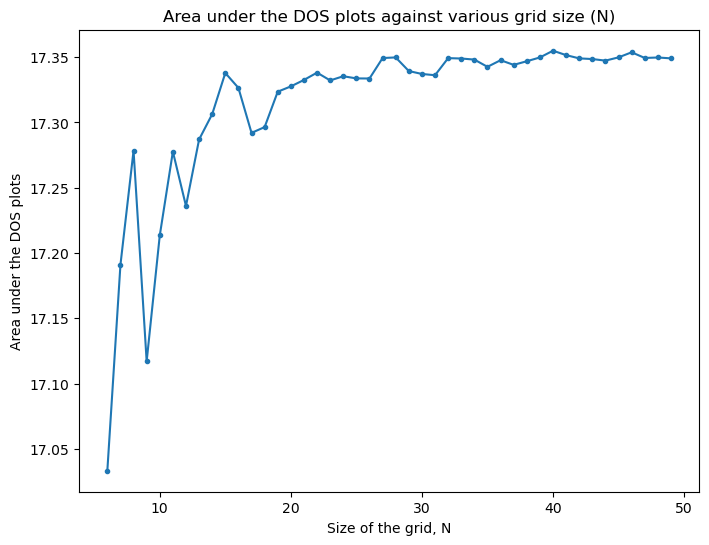

In [62]:
plt.plot(np.arange(2,50)[4:], area_list[3:],marker='.',linestyle='-')
plt.title("Area under the DOS plots against various grid size (N)")
plt.xlabel('Size of the grid, N')
plt.ylabel('Area under the DOS plots')

plt.show()


**Questions:**<br>
1. Explain the connection between the density of states and the dispersion curves?
2. The density of states for 1x1x1 grid was computed for a single k-point, can you work out which k-point (W, L, $\Gamma$ or X) by examining the dispersion curves? Explain your reasoning.
3. Density of states as a function of grid size?
    - Compare the DOS plots for different grid sizes (change the grid size in the code until you see no change in the DOS). Why do we see more features in the DOS as we increase the grid size?
    - What grid size would you consider reasonable for the DOS calculation based only on the observation of the plots?
    - Describe how would you determine a reasonable grid size in a more systematic using the DOS calculation.
4. Plot the CPU time (time to run the calculation) vs N and describe the trend. What type of function is it following? Why?.<br>


3 is ok
4 is ok
5 is ok
6 is ok
7 is ok
8 is ok
9 is ok
10 is ok
11 is ok
12 is ok
13 is ok
14 is ok
15 is ok
16 is ok
17 is ok
18 is ok
19 is ok
20 is ok
21 is ok
22 is ok
23 is ok
24 is ok
25 is ok
26 is ok
27 is ok
28 is ok
29 is ok
30 is ok
31 is ok
32 is ok
33 is ok
34 is ok
35 is ok
36 is ok
37 is ok
38 is ok
39 is ok
40 is ok
41 is ok
42 is ok
43 is ok
44 is ok
45 is ok
46 is ok
47 is ok
48 is ok
49 is ok


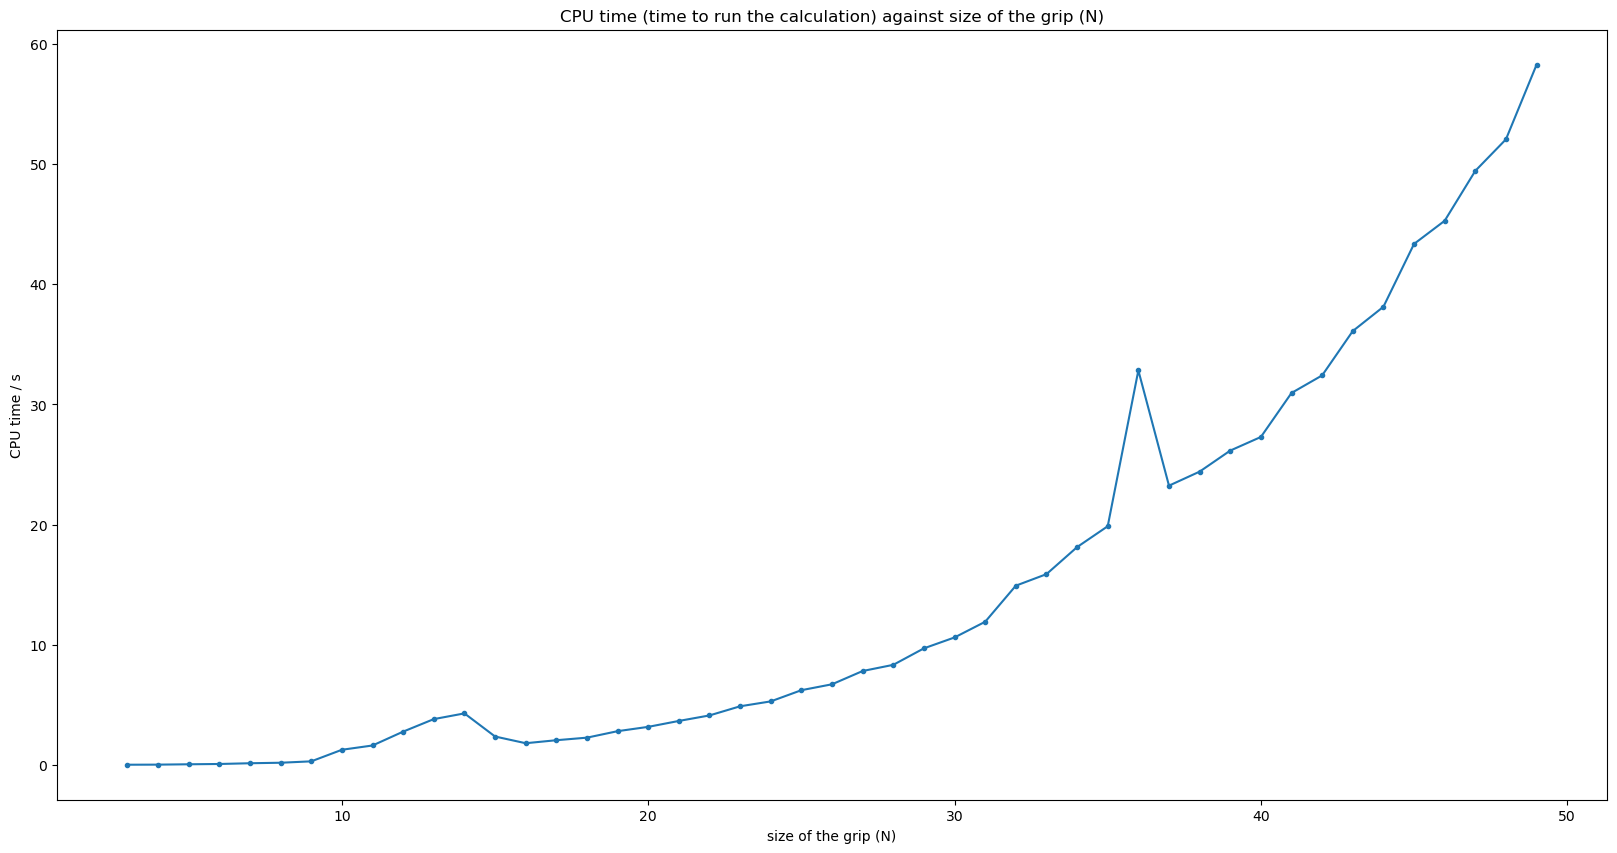

In [49]:
# the imports first, always
%matplotlib inline
from ase.calculators.gulp import GULP
import matplotlib.pyplot as plt
from math import ceil
from ase.spacegroup import crystal
import numpy as np
from time import time

# the import first
import set_mygulp_vars
import matplotlib.pyplot as plt
import numpy as np
import warnings
import math
from ase.calculators.gulp import GULP
from ase.spacegroup import crystal
from ase.dft.kpoints import ibz_points, bandpath
from ase.visualize import view
from scipy.spatial.distance import pdist

#grids = '1 2 3 5 7 9 12 15 17 20 24 28 32 36 40'
#grids = [int(x) for x in grids.split()]

grids = np.arange(2,50)[1:]

label = 'mgo_dos'


#Plotting options
#plt.rcParams['figure.figsize'] = [20, 10]
#c = ['#E70000','#FF8C00','#FFEF00','#00811F','#0044FF','#760089']

if len(grids) <= 4:
    nc_plots = 2
else:
    nc_plots = 3

MgO_dos = crystal('MgO',basis=[[0.0,0.0,0.0],[0.5,0.5,0.5]],spacegroup=225,cellpar=[a_opt, a_opt, a_opt, 90, 90, 90],primitive_cell=True)


index = 0
times = []
for i in grids:
    b = time()
    index += 1
    label = 'mgo_ph_dos_'+str(i)
    #----------------------here-----------------------
    options = ['shrink {} {} {}'.format(i, i, i),'output phon '+label]
    calc = GULP(label=label ,keywords='conp phon', library='ionic.lib',options=options)
    dos_file = label+'.dens'
    MgO_dos.calc = calc
    Energy = MgO_dos.get_potential_energy()
    result = np.loadtxt(label+'.dens')
    result = np.concatenate((result,np.array([[result[-1][0]+5,0.0],[1200,0.0]])),axis = 0)
    
    print(i,'is ok')
    times.append(time()-b)

    
plt.plot(grids,times,marker='.',linestyle='-')
plt.title("CPU time (time to run the calculation) against size of the grip (N)")
plt.xlabel('size of the grip (N)')
plt.ylabel('CPU time / s')

plt.show()

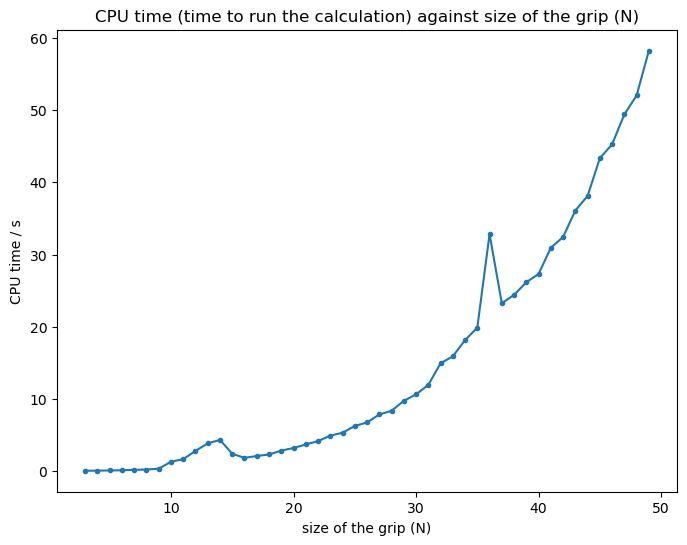

In [58]:
plt.plot(grids,times,marker='.',linestyle='-')
plt.title("CPU time (time to run the calculation) against size of the grip (N)")
plt.xlabel('size of the grip (N)')
plt.ylabel('CPU time / s')

plt.show()

Compare the DOS plots for different grid sizes (change the grid size in the code until you see no change in the DOS). Why do we see more features in the DOS as we increase the grid size?



<p style="color:red;">Describe how would you determine a reasonable grid size in a more systematic using the DOS calculation.</p>




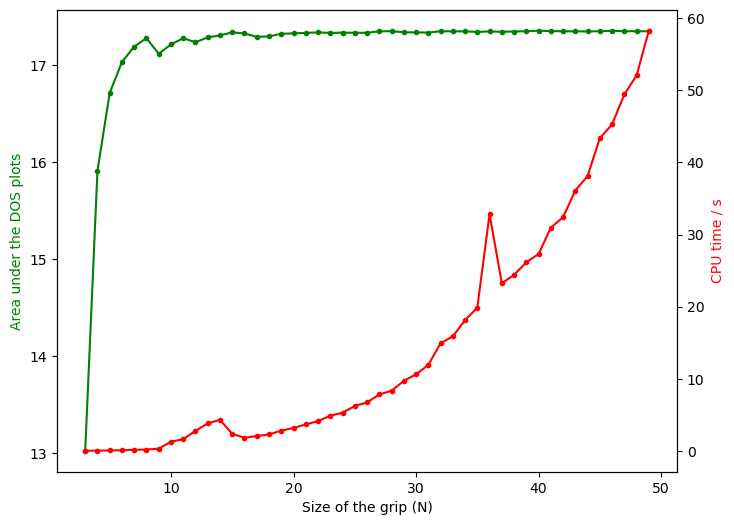

In [57]:
plt.rcParams['figure.figsize'] = [8, 6]

fig, ax1 = plt.subplots()



ax2 = ax1.twinx()
ax1.plot(grids, area_list,color='g',marker='.',linestyle='-')
ax2.plot(grids, times,color='r',marker='.',linestyle='-')

ax1.set_xlabel('Size of the grip (N)')
ax1.set_ylabel('Area under the DOS plots', color='g')
ax2.set_ylabel('CPU time / s', color='r')


plt.show()

- why increasing the number of grid sizes (shrinking factors), will increase the sampling (k values)
- smapling the k spaces

<a href="../main.ipynb">Main</a>   <a href="free_energy.ipynb">Next</a>